In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import warnings 
warnings.filterwarnings('ignore')

In [2]:
load_dotenv()
user            = os.environ['usr']
password        = os.environ['pas']
host            = os.environ['hos']
port            = os.environ['por']
datawarehouse   = os.environ['dwh']
datascience     = os.environ['ds']

# Connect to Database

mydb = create_engine("mysql+pymysql://{usr}:{pasx}@{hosx}:{port}/{namadb}".format(
                            usr=user, pasx=password, hosx=host, port=port, namadb=datawarehouse))



In [3]:
fact_genre = pd.read_sql("select * from fact_table_genre", mydb)
fact_genre.head()

,sk_movie,sk_genre
0,1,7
1,1,5
2,1,4
3,2,7
4,2,4


In [4]:
dim_genre = pd.read_sql("select * from dim_genre", mydb)
dim_genre.head()

,sk_genre,genre_id,genre_name
0,1,1,Action
1,2,2,Adventure
2,3,3,Animation
3,4,4,Comedy
4,5,5,Crime


In [5]:
genre = pd.merge(fact_genre, dim_genre, how='left').drop(columns=['genre_id', 'sk_genre'])
genre.head()

,sk_movie,genre_name
0,1,Drama
1,1,Crime
2,1,Comedy
3,2,Drama
4,2,Comedy


In [6]:
genre = genre.groupby('sk_movie').apply(lambda x: ','.join(x.genre_name)).reset_index().rename(columns={'sk_movie':'sk_movie'})
genre.head()

,sk_movie,0
0,1,"Drama,Crime,Comedy"
1,2,"Drama,Comedy"
2,3,"Crime,Comedy"
3,4,"Action,Thriller,Crime"
4,5,Drama


In [7]:
genre = genre.rename(columns= {0 : 'genre'})
genre.head()

,sk_movie,genre
0,1,"Drama,Crime,Comedy"
1,2,"Drama,Comedy"
2,3,"Crime,Comedy"
3,4,"Action,Thriller,Crime"
4,5,Drama


In [8]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138929 entries, 0 to 138928
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sk_movie  138929 non-null  int64 
 1   genre     138929 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [9]:
dim_keyword = pd.read_sql("select * from dim_keyword", mydb)
dim_keyword.head()

,sk_keyword,keyword_id,keyword_name
0,1,1,underdog
1,2,2,prison
2,3,3,factory worker
3,4,4,prisoner
4,5,5,helsinki


In [10]:
fact_keyword = pd.read_sql("select * from fact_table_keyword", mydb)
fact_keyword.head()

,sk_movie,sk_keyword
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [11]:
keyword = pd.merge(fact_keyword, dim_keyword, how='left').drop(columns=['sk_keyword', 'keyword_id'])
keyword.head()

,sk_movie,keyword_name
0,1,underdog
1,1,prison
2,1,factory worker
3,1,prisoner
4,1,helsinki


In [12]:
keyword = keyword.groupby('sk_movie').apply(lambda x: ','.join(x.keyword_name)).reset_index().rename(columns={'sk_movie':'sk_movie'})
keyword.head()

,sk_movie,0
0,1,"underdog,prison,factory worker,prisoner,helsin..."
1,2,"salesclerk,helsinki, finland,garbage"
2,3,"hotel,new year's eve,witch,bet,hotel room,sper..."
3,4,"chicago, illinois,drug dealer,escape,one night..."
4,5,"sailboat,dying and death"


In [13]:
keyword = keyword.rename(columns={0 : 'keyword'})
keyword.head()

,sk_movie,keyword
0,1,"underdog,prison,factory worker,prisoner,helsin..."
1,2,"salesclerk,helsinki, finland,garbage"
2,3,"hotel,new year's eve,witch,bet,hotel room,sper..."
3,4,"chicago, illinois,drug dealer,escape,one night..."
4,5,"sailboat,dying and death"


In [14]:
dim_company = pd.read_sql("select * from dim_company", mydb)
dim_company.head()

,sk_company,company_id,company_name
0,1,1,Lucasfilm Ltd.
1,2,2,Walt Disney Pictures
2,3,3,Pixar
3,4,4,Paramount
4,5,5,Columbia Pictures


In [15]:
fact_company = pd.read_sql("select * from fact_table_company", mydb)
fact_company.head()

,sk_movie,sk_company
0,1,10112
1,2,10112
2,3,13
3,3,52
4,4,29


In [16]:
company = pd.merge(fact_company, dim_company, how='left').drop(columns=['company_id', 'sk_company'], axis=1)
company.head()

,sk_movie,company_name
0,1,Villealfa Filmproductions
1,2,Villealfa Filmproductions
2,3,Miramax
3,3,A Band Apart
4,4,Universal Pictures


In [17]:
company = company.groupby('sk_movie').apply(lambda x: ','.join(x.company_name)).reset_index().rename(columns={'sk_movie':'sk_movie'})
company.head()

,sk_movie,0
0,1,Villealfa Filmproductions
1,2,Villealfa Filmproductions
2,3,"Miramax,A Band Apart"
3,4,"Universal Pictures,Largo Entertainment,JVC"
4,6,"20th Century Fox,Lucasfilm Ltd."


In [18]:
company = company.rename(columns={0 : 'company'})
company.head()

,sk_movie,company
0,1,Villealfa Filmproductions
1,2,Villealfa Filmproductions
2,3,"Miramax,A Band Apart"
3,4,"Universal Pictures,Largo Entertainment,JVC"
4,6,"20th Century Fox,Lucasfilm Ltd."


In [19]:
fact_movie      = pd.read_sql('select * from fact_table_movie', mydb)
dim_movie       = pd.read_sql('select * from dim_movie', mydb)
dim_collection  = pd.read_sql('select * from dim_collection', mydb)
dim_language    = pd.read_sql('select * from dim_language', mydb)
dim_waktu       = pd.read_sql('select * from dim_waktu', mydb)

In [20]:
waktu = pd.merge(fact_movie, dim_waktu, how='left')
waktu.head()

,sk_movie,sk_collection,sk_country,sk_waktu,runtime,budget,revenue,popularity,vote_average,vote_count,release_year
0,1,NaN,68.0,94,73,0,0,10.726,6.8,113,1988
1,2,NaN,68.0,92,72,0,0,9.215,7.3,118,1986
2,3,NaN,NaN,101,98,4000000,4257354,16.877,5.8,1753,1995
3,4,NaN,NaN,99,110,21000000,12136938,9.514,6.5,163,1993
4,5,NaN,55.0,110,15,0,0,2.251,6.9,7,2004


In [21]:
language = pd.merge(waktu, dim_language, how='left')
language.head()

,sk_movie,sk_collection,sk_country,sk_waktu,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_code,country_name
0,1,NaN,68.0,94,73,0,0,10.726,6.8,113,1988,fi,Finland
1,2,NaN,68.0,92,72,0,0,9.215,7.3,118,1986,fi,Finland
2,3,NaN,NaN,101,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN
3,4,NaN,NaN,99,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN
4,5,NaN,55.0,110,15,0,0,2.251,6.9,7,2004,de,Germany


In [22]:
collection = pd.merge(language, dim_collection, how='left')
collection.head()

,sk_movie,sk_collection,sk_country,sk_waktu,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_code,country_name,collection_id,collection_name
0,1,NaN,68.0,94,73,0,0,10.726,6.8,113,1988,fi,Finland,NaN,NaN
1,2,NaN,68.0,92,72,0,0,9.215,7.3,118,1986,fi,Finland,NaN,NaN
2,3,NaN,NaN,101,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,NaN,NaN
3,4,NaN,NaN,99,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,NaN,NaN
4,5,NaN,55.0,110,15,0,0,2.251,6.9,7,2004,de,Germany,NaN,NaN


In [23]:
movie = pd.merge(collection, dim_movie, how='left')
movie.head()

,sk_movie,sk_collection,sk_country,sk_waktu,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_code,country_name,collection_id,collection_name,movie_id,movie_name,movie_overview,movie_poster_path
0,1,NaN,68.0,94,73,0,0,10.726,6.8,113,1988,fi,Finland,NaN,NaN,2,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,2,NaN,68.0,92,72,0,0,9.215,7.3,118,1986,fi,Finland,NaN,NaN,3,Shadows in Paradise,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,3,NaN,NaN,101,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,NaN,NaN,5,Four Rooms,It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg
3,4,NaN,NaN,99,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,NaN,NaN,6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg
4,5,NaN,55.0,110,15,0,0,2.251,6.9,7,2004,de,Germany,NaN,NaN,9,Sunday in August,None,None


In [24]:
movie.shape

(159726, 19)

In [25]:
movie.isnull().sum()

sk_movie                  0
sk_collection        150847
sk_country           102663
sk_waktu                  0
runtime                   0
budget                    0
revenue                   0
popularity                0
vote_average              0
vote_count                0
release_year              0
country_code         102663
country_name         102663
collection_id        150847
collection_name      150847
movie_id                  0
movie_name                0
movie_overview        23939
movie_poster_path     43753
dtype: int64

In [26]:
movie = movie.drop(columns=['sk_collection', 'sk_country',
                            'sk_country', 'sk_waktu',
                            'country_code', 'collection_id'])
movie.head()

,sk_movie,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_name,collection_name,movie_id,movie_name,movie_overview,movie_poster_path
0,1,73,0,0,10.726,6.8,113,1988,Finland,NaN,2,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,2,72,0,0,9.215,7.3,118,1986,Finland,NaN,3,Shadows in Paradise,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,3,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,5,Four Rooms,It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg
3,4,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg
4,5,15,0,0,2.251,6.9,7,2004,Germany,NaN,9,Sunday in August,None,None


In [27]:
data1 = pd.merge(movie, genre, left_on='sk_movie', right_on='sk_movie', how='left')
data1.head()

,sk_movie,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_name,collection_name,movie_id,movie_name,movie_overview,movie_poster_path,genre
0,1,73,0,0,10.726,6.8,113,1988,Finland,NaN,2,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,"Drama,Crime,Comedy"
1,2,72,0,0,9.215,7.3,118,1986,Finland,NaN,3,Shadows in Paradise,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,"Drama,Comedy"
2,3,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,5,Four Rooms,It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,"Crime,Comedy"
3,4,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,"Action,Thriller,Crime"
4,5,15,0,0,2.251,6.9,7,2004,Germany,NaN,9,Sunday in August,None,None,Drama


In [28]:
data2 = pd.merge(data1, keyword, how='left')
data2.head()

,sk_movie,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_name,collection_name,movie_id,movie_name,movie_overview,movie_poster_path,genre,keyword
0,1,73,0,0,10.726,6.8,113,1988,Finland,NaN,2,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,"Drama,Crime,Comedy","underdog,prison,factory worker,prisoner,helsin..."
1,2,72,0,0,9.215,7.3,118,1986,Finland,NaN,3,Shadows in Paradise,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,"Drama,Comedy","salesclerk,helsinki, finland,garbage"
2,3,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,5,Four Rooms,It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,"Crime,Comedy","hotel,new year's eve,witch,bet,hotel room,sper..."
3,4,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,"Action,Thriller,Crime","chicago, illinois,drug dealer,escape,one night..."
4,5,15,0,0,2.251,6.9,7,2004,Germany,NaN,9,Sunday in August,None,None,Drama,"sailboat,dying and death"


In [29]:
data3 = pd.merge(data2, company, how='left').drop(columns={'sk_movie'})
data3.head()

,runtime,budget,revenue,popularity,vote_average,vote_count,release_year,country_name,collection_name,movie_id,movie_name,movie_overview,movie_poster_path,genre,keyword,company
0,73,0,0,10.726,6.8,113,1988,Finland,NaN,2,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,"Drama,Crime,Comedy","underdog,prison,factory worker,prisoner,helsin...",Villealfa Filmproductions
1,72,0,0,9.215,7.3,118,1986,Finland,NaN,3,Shadows in Paradise,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,"Drama,Comedy","salesclerk,helsinki, finland,garbage",Villealfa Filmproductions
2,98,4000000,4257354,16.877,5.8,1753,1995,NaN,NaN,5,Four Rooms,It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,"Crime,Comedy","hotel,new year's eve,witch,bet,hotel room,sper...","Miramax,A Band Apart"
3,110,21000000,12136938,9.514,6.5,163,1993,NaN,NaN,6,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,"Action,Thriller,Crime","chicago, illinois,drug dealer,escape,one night...","Universal Pictures,Largo Entertainment,JVC"
4,15,0,0,2.251,6.9,7,2004,Germany,NaN,9,Sunday in August,None,None,Drama,"sailboat,dying and death",NaN


In [35]:
movie_data = data3.iloc[:,[9, 10, 13, 6, 7, 14, 8, 15, 11, 12, 0, 1, 2, 3, 4, 5]]
movie_data.head()

,movie_id,movie_name,genre,release_year,country_name,keyword,collection_name,company,movie_overview,movie_poster_path,runtime,budget,revenue,popularity,vote_average,vote_count
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",NaN,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,73,0,0,10.726,6.8,113
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",NaN,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,72,0,0,9.215,7.3,118
2,5,Four Rooms,"Crime,Comedy",1995,NaN,"hotel,new year's eve,witch,bet,hotel room,sper...",NaN,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,98,4000000,4257354,16.877,5.8,1753
3,6,Judgment Night,"Action,Thriller,Crime",1993,NaN,"chicago, illinois,drug dealer,escape,one night...",NaN,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,110,21000000,12136938,9.514,6.5,163
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",NaN,NaN,None,None,15,0,0,2.251,6.9,7


In [36]:
movie_data = movie_data.rename(columns={'country_name':'language', 
                                        'collection_name':'collection', 'movie_overview':'overview'})
movie_data.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,runtime,budget,revenue,popularity,vote_average,vote_count
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",NaN,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,73,0,0,10.726,6.8,113
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",NaN,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,72,0,0,9.215,7.3,118
2,5,Four Rooms,"Crime,Comedy",1995,NaN,"hotel,new year's eve,witch,bet,hotel room,sper...",NaN,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,98,4000000,4257354,16.877,5.8,1753
3,6,Judgment Night,"Action,Thriller,Crime",1993,NaN,"chicago, illinois,drug dealer,escape,one night...",NaN,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,110,21000000,12136938,9.514,6.5,163
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",NaN,NaN,None,None,15,0,0,2.251,6.9,7


In [37]:
movie_data.shape

(159726, 16)

In [38]:
movie_data.isnull().sum()

movie_id                  0
movie_name                0
genre                 20793
release_year              0
language             102663
keyword               86424
collection           150847
company               56708
overview              23939
movie_poster_path     43753
runtime                   0
budget                    0
revenue                   0
popularity                0
vote_average              0
vote_count                0
dtype: int64

# Preprocessing Data

# cleaning data Null

In [39]:
movie_data['genre'].fillna(" ", inplace=True)
movie_data['language'].fillna(" ", inplace=True)
movie_data['keyword'].fillna(" ", inplace=True)
movie_data['collection'].fillna(" ", inplace=True)
movie_data['company'].fillna(" ", inplace=True)
movie_data['overview'].fillna(" ", inplace=True)
movie_data['movie_poster_path'].fillna(" ", inplace=True)

movie_data.isnull().sum()

movie_id             0
movie_name           0
genre                0
release_year         0
language             0
keyword              0
collection           0
company              0
overview             0
movie_poster_path    0
runtime              0
budget               0
revenue              0
popularity           0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot: >

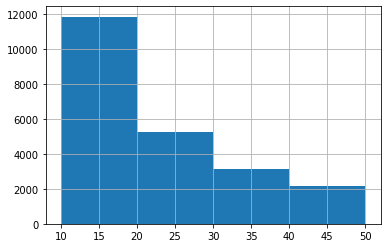

In [40]:
movie_data.vote_count.hist(bins= [10, 20, 30, 40, 50])

In [41]:
mydb2 = create_engine("mysql+pymysql://{usr}:{pasx}@{hosx}:{port}/{namadb}".format(
                            usr=user, pasx=password, hosx=host, port=port, namadb=datascience))


movie_data.to_sql('movie_data2', mydb2, if_exists='append', index=False)

159726